In [18]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import local_linear
import scipy.spatial as spatial
import glob
import copy
import imageio
import os 

In [2]:
starts = {'25':[1187,3119,4684,6591,8931],'57':[3043],'76':[1249,3230,4943,6587,8487],'89':[855,2393,3914,5456,6990,8508]}
loc = 'data/'

In [3]:
lenny = 200
dater = []
for k in starts.keys():
    for start in starts[k]:
        data = np.zeros((lenny,1,480,640))
        for q in range(lenny):
            data[q]=imageio.imread(os.path.join(loc,k,f'frames{q+start:07}.png'))[-480:,:,1]
        dater.append(copy.copy(data))


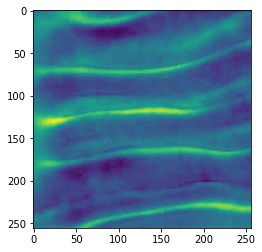

In [4]:
plt.figure()
plt.imshow(dater[0][0,0,100:356,150:406])
plt.show()

In [91]:
wid = 0
dat = np.stack([d[:200+(wid*2):2,0:,100:356,150:406] for d in dater],axis=1)
#sdat = np.zeros_like(dat)
#for q in range(len(dat)-wid):
#    sdat[q] = np.mean(dat[q:(q+wid)],axis=0)
#dat = sdat[:-wid]
dat = dat.reshape([17*(100),256,256,1])
dat.shape

(1700, 256, 256, 1)

In [92]:
chipsizes=[8,8,4]
n_components=[12,64,0]
reduces = [10,5,1]
#n_components=[12,32,64]
#reduces = [5,5,2]

pcap = local_linear.PCA_pyramid(reduces=reduces,chipsizes=chipsizes,n_components=n_components)

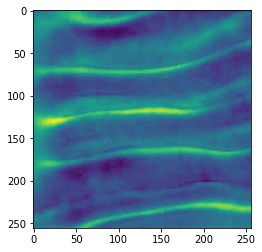

In [93]:
plt.figure()
plt.imshow(dat[0][:,:,0])
plt.show()

In [94]:
daty = pcap.fit_transform(dat)

Starting level 0
Starting level 1
Starting level 2
503


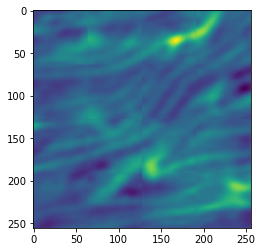

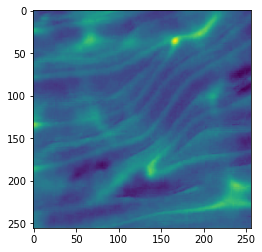

In [95]:
n = 200
r = pcap.reverse(daty[n:n+1])  #this keeps the dim
plt.figure()
plt.imshow(r.squeeze())#-dat[100].squeeze())
plt.show()
plt.figure()
plt.imshow(dat[n].squeeze())
plt.show()

In [110]:
dats = daty.reshape([100,17,-1])
filt = np.ones(1)
sdats = np.apply_along_axis(lambda m: np.convolve(m, filt, mode='full'), axis=0, arr=dats)
sdats.shape

(100, 17, 503)

In [111]:
numframes=17
ps=100

In [112]:
#reload(local_linear)
As,frame_ass = local_linear.local_linear(dats,2,nearest=False)

[ 0.          0.35416667  0.70833333  1.0625      1.41666667  1.77083333
  2.125       2.47916667  2.83333333  3.1875      3.54166667  3.89583333
  4.25        4.60416667  4.95833333  5.3125      5.66666667  6.02083333
  6.375       6.72916667  7.08333333  7.4375      7.79166667  8.14583333
  8.5         8.85416667  9.20833333  9.5625      9.91666667 10.27083333
 10.625      10.97916667 11.33333333 11.6875     12.04166667 12.39583333
 12.75       13.10416667 13.45833333 13.8125     14.16666667 14.52083333
 14.875      15.22916667 15.58333333 15.9375     16.29166667 16.64583333
 17.        ]
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17


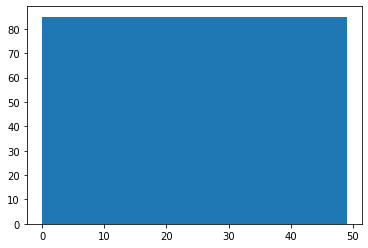

In [113]:
plt.figure()
plt.hist(frame_ass.flatten())
plt.show()

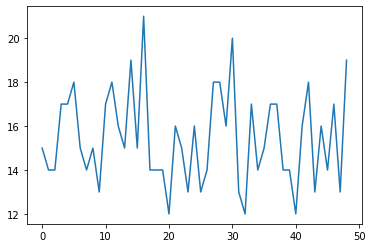

In [114]:
ne = []
mv = []
ee = []
nvec = 32
for A in As:
    e,v = np.linalg.eig(A[1:nvec,1:nvec])
    ne.append(len(np.where(np.real(e)>0)[0]))
    ee.append(e)
    mv.append(v)
    #plt.figure()
    #plt.plot(np.sort(np.real(e)))
    #plt.title(f'{len(np.where(np.real(e)>0)[0])} Positive')
    #plt.show()
plt.figure()
plt.plot(ne)
plt.show()

In [115]:
ve = []
vv = []
thr = .25
for q in range(48):
    ve.append([])
    vv.append([])
    for m in range(15):
        for n in range(15):
            if mv[q][m].dot(mv[q+1][n]) > thr:
                print(f"keeping {q},{m}")
                vv[-1].append(mv[q][m])
                ve[-1].append(ee[q][m])
                break

keeping 0,0
keeping 0,1
keeping 0,2
keeping 0,3
keeping 0,4
keeping 0,5
keeping 0,6
keeping 0,9
keeping 0,13
keeping 1,0
keeping 1,5
keeping 1,7
keeping 1,12
keeping 1,13
keeping 1,14
keeping 2,1
keeping 2,3
keeping 2,8
keeping 2,10
keeping 2,11
keeping 2,12
keeping 2,13
keeping 2,14
keeping 3,1
keeping 3,2
keeping 3,3
keeping 3,5
keeping 3,7
keeping 3,8
keeping 3,13
keeping 3,14
keeping 4,0
keeping 4,1
keeping 4,2
keeping 4,3
keeping 4,4
keeping 4,8
keeping 4,12
keeping 4,13
keeping 4,14
keeping 5,1
keeping 5,3
keeping 5,5
keeping 5,11
keeping 5,12
keeping 5,13
keeping 5,14
keeping 6,0
keeping 6,1
keeping 6,2
keeping 6,3
keeping 6,5
keeping 6,6
keeping 6,7
keeping 6,9
keeping 6,10
keeping 6,11
keeping 6,13
keeping 7,0
keeping 7,1
keeping 7,6
keeping 7,9
keeping 7,14
keeping 8,1
keeping 8,3
keeping 8,5
keeping 8,12
keeping 8,14
keeping 9,0
keeping 9,6
keeping 9,8
keeping 9,10
keeping 9,13
keeping 9,14
keeping 10,1
keeping 10,6
keeping 10,7
keeping 10,9
keeping 10,10
keeping 10,14
keepi

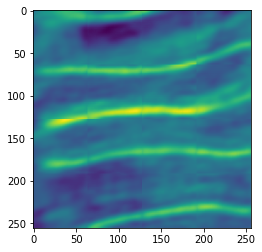

In [116]:
r = pcap.reverse(daty[n:n+1])  #this keeps the dim
plt.figure()
plt.imshow(r.squeeze())#-dat[100].squeeze())
plt.show()


In [117]:
#for n,te in enumerate(ve):
    #plt.figure()
    #plt.title(f'{n}')
    #plt.scatter(np.real(te),np.imag(te))
    #plt.show()

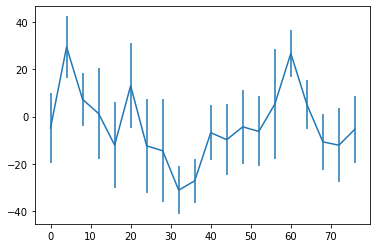

In [118]:
sse = [np.mean(np.maximum(np.minimum(100,np.real(e)),-100)) for e in ve[:20]]
ssee = [np.std(np.maximum(np.minimum(100,np.real(e)),-100))/np.sqrt(17) for e in ve[:20]]
plt.figure()
plt.errorbar(np.arange(0,20*4,4),sse,yerr=ssee)
plt.show()

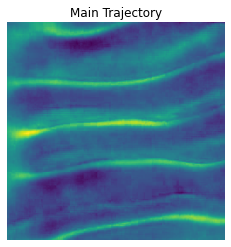

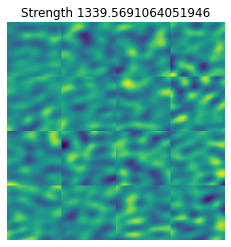

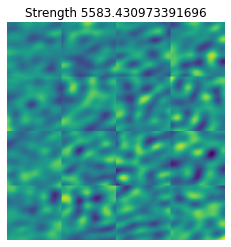

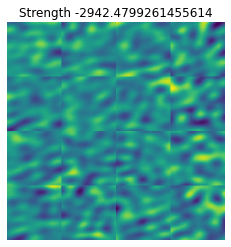

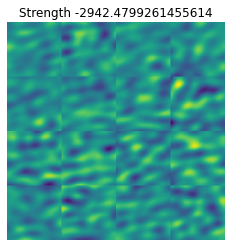

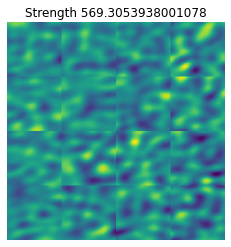

In [71]:
n = 0
plt.figure()
plt.imshow(dater[0][2*2*n,0,100:356,150:406].squeeze())
plt.title('Main Trajectory')
plt.axis('off')
#plt.savefig(f"data/traj{n}.png")
plt.show()
for q in range(5):
    thing = np.random.randn(*daty[0:1].shape)
    #thing = np.zeros_like(daty[0:1])
    #thing[0,1:32] = vv[n][q]
    r = pcap.reverse(thing)
    plt.figure()
    plt.title(f'Strength {np.real(ve[n][q])}')
    plt.imshow(r.squeeze())#-dat[100].squeeze())
    plt.axis('off')
    #plt.savefig(f"data/dir{n}_{q}.png")
    plt.show()


In [68]:
magic_ns = []
for nn in range(n,n+10):
    base = dats[n*2,0]
    magic_nns = []
    for vecn in range(5):
        thing = np.zeros_like(daty[0:1])
        thing[0,1:32] = vv[nn][vecn]
        vec = pcap.reverse(thing)
        dots = []
        for q in range(dats.shape[1]-1):
            dots.append(np.sum((dater[0][2*nn,0,100:356,150:406].squeeze()-dater[q+1][2*nn,0,100:356,150:406].squeeze()).dot(vec)))
        ind = np.argmax(dots)
        magic_nns.append([vecn,nn,ind,np.real(ve[nn][vecn])])
    magic_ns.append(magic_nns)
magic_ns

C:\Users\water\AppData\Local\Temp/ipykernel_3708/1427669363.py:7: ComplexWarning: Casting complex values to real discards the imaginary part
  thing[0,1:32] = vv[nn][vecn]


[[[0, 0, 2, 76.34451039401577],
  [1, 0, 4, -22.242393036811073],
  [2, 0, 4, 1.4442940326639793],
  [3, 0, 4, 20.664941329637564],
  [4, 0, 2, -8.506835965366628]],
 [[0, 1, 15, -129.15210985615863],
  [1, 1, 12, -129.15210985615863],
  [2, 1, 12, 44.32257184902235],
  [3, 1, 4, -37.41937254309882],
  [4, 1, 11, 33.96102572850521]],
 [[0, 2, 4, 2002.7822673798398],
  [1, 2, 15, 392.0320851644556],
  [2, 2, 12, 13.597725985181878],
  [3, 2, 4, 330.08323476187206],
  [4, 2, 12, 330.08323476187206]],
 [[0, 3, 15, -1354.678643395329],
  [1, 3, 15, -194.27021769789428],
  [2, 3, 11, 143.43325792297887],
  [3, 3, 15, -65.07808672894677],
  [4, 3, 7, 88.51946779315854]],
 [[0, 4, 11, -101.13364208369082],
  [1, 4, 11, 59.074027655641075],
  [2, 4, 8, -23.458077954910326],
  [3, 4, 11, 3.1405586659304374],
  [4, 4, 15, 16.291127522770303]],
 [[0, 5, 4, 754.3031656644448],
  [1, 5, 3, 134.56179568248854],
  [2, 5, 1, -50.64780628350581],
  [3, 5, 15, -164.32899715390496],
  [4, 5, 4, -164.3289

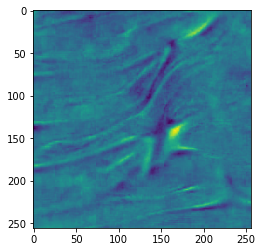

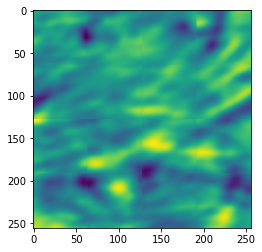

In [89]:
aaaa = ((dater[0][2*nn,0,100:356,150:406].squeeze()-dater[q+1][2*nn,0,100:356,150:406].squeeze())).squeeze()
plt.figure()
plt.imshow(aaaa)
plt.show()
plt.figure()
plt.imshow(vec.squeeze())
plt.show()

In [90]:
plt.close('all')

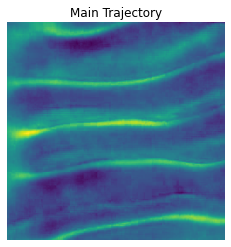

C:\Users\water\AppData\Local\Temp/ipykernel_3708/1533299528.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  thing[0,1:nvec] = vv[nn][vecn]


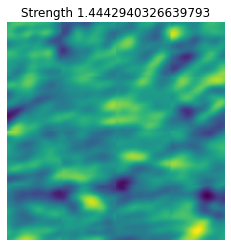

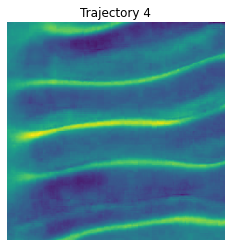

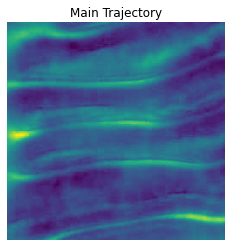

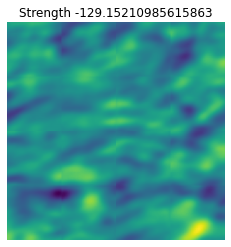

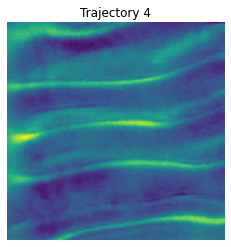

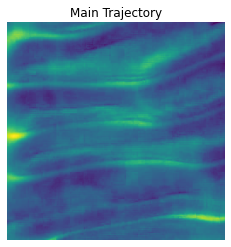

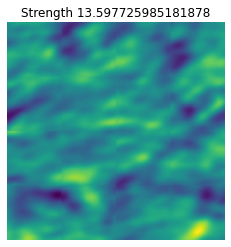

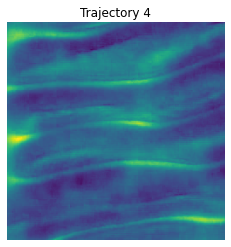

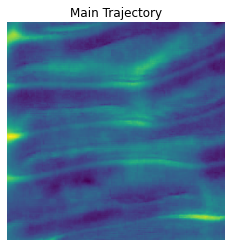

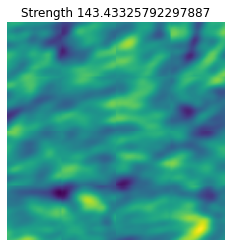

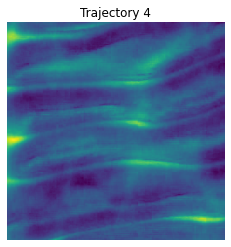

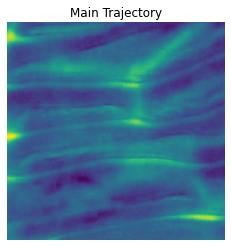

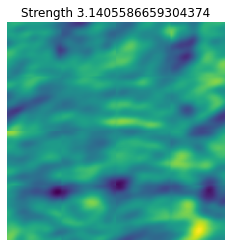

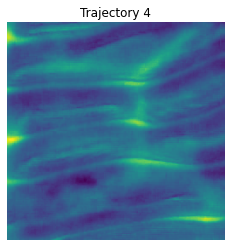

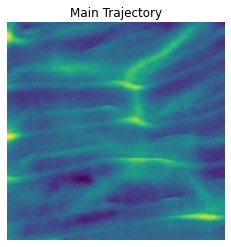

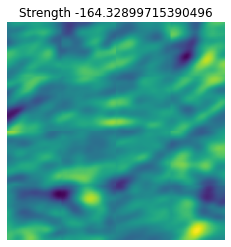

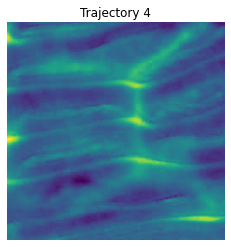

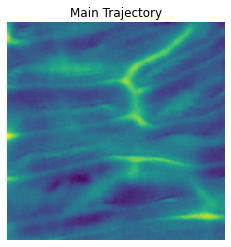

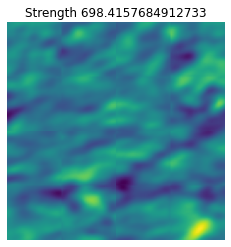

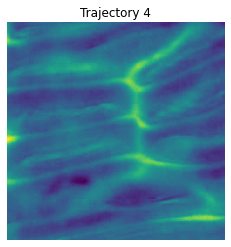

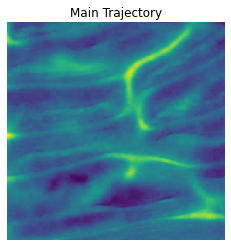

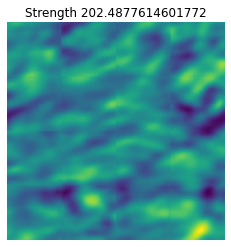

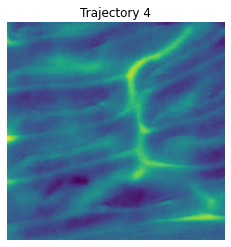

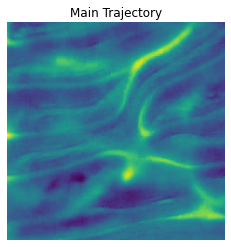

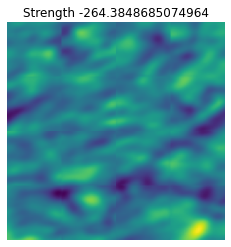

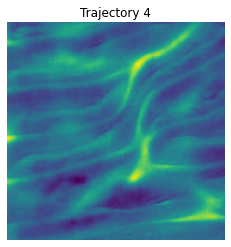

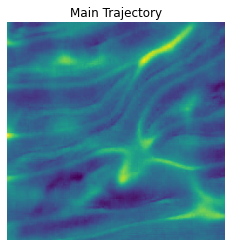

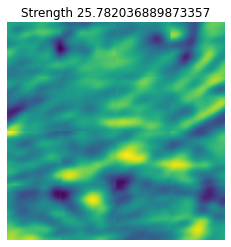

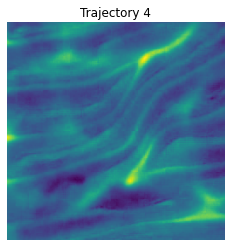

In [75]:
l = 5
ind=4
for nn in range(n,n+10):
    plt.figure()
    plt.imshow(dater[0][2*nn,0,100:356,150:406].squeeze())
    plt.title('Main Trajectory')
    plt.axis('off')
    plt.savefig(f"outputs/traj_{nn}.png")
    plt.show()
    comps = []
    for vecn in range(5):
        thing = np.zeros_like(daty[0:1])
        thing[0,1:nvec] = vv[nn][vecn]
        vec = pcap.reverse(thing)
        comp = np.sum((dater[0][2*nn,0,100:356,150:406].squeeze()-dater[q+1][2*nn,0,100:356,150:406].squeeze()).dot(vec))
        comps.append(comp)
        plt.figure()
        plt.title(f'Alignment {comp}')
        plt.imshow(vec.squeeze())#-dat[100].squeeze())
        plt.axis('off')
        plt.savefig(f"outputs/vec_{nn}_{vecn}.png")
        plt.show()
    veci = np.argmax(comps)
    aaaa = ((dater[0][2*nn,0,100:356,150:406].squeeze()-dater[q+1][2*nn,0,100:356,150:406].squeeze())).squeeze()
    plt.figure()
    plt.imshow(aaaa)
    plt.title(f'Diff_{nn}')
    plt.show()

    plt.figure()
    plt.imshow(dater[ind][2*(nn),0,100:356,150:406].squeeze())
    plt.title(f'Trajectory {ind}')
    plt.axis('off')
    plt.savefig(f"outputs/traj1_{nn}.png")
    plt.show()


C:\Users\water\AppData\Local\Temp/ipykernel_3708/2414320661.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  thing[0,1:32] = vv[n][vecn]


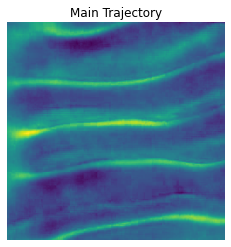

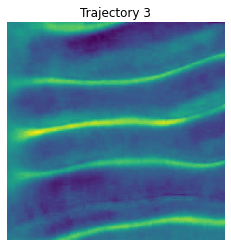

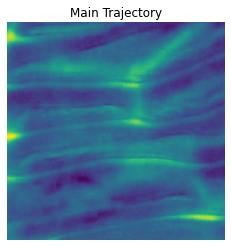

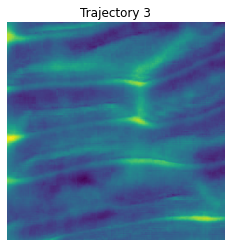

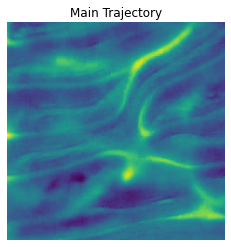

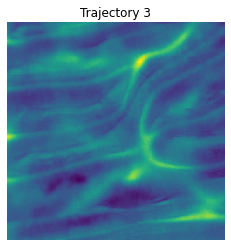

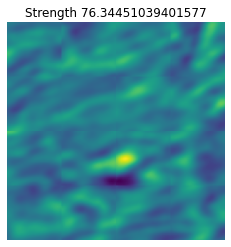

In [ ]:
vecn = 0
base = dats[n*2,0]
thing = np.zeros_like(daty[0:1])
thing[0,1:32] = vv[n][vecn]
vec = pcap.reverse(thing)
dots = []
for q in range(dats.shape[1]):
    dots.append(np.sum((dater[0][2*2*n,0,100:356,150:406].squeeze()-dater[q][2*2*n,0,100:356,150:406].squeeze()).dot(vec)))
ind = np.argmax(dots)

l = 3
for q in range(l):
    plt.figure()
    plt.imshow(dater[0][(2*2*n) + 8*q,0,100:356,150:406].squeeze())
    plt.title('Main Trajectory')
    plt.axis('off')
    #plt.savefig(f"data/traj{n}.png")
    plt.show()
    plt.figure()
    plt.imshow(dater[ind][(2*2*n) + 8*q,0,100:356,150:406].squeeze())
    plt.title(f'Trajectory {ind}')
    plt.axis('off')
    #plt.savefig(f"data/traj{n}.png")
    plt.show()

plt.figure()
plt.title(f'Strength {np.real(ve[n][vecn])}')
plt.imshow(r.squeeze())#-dat[100].squeeze())
plt.axis('off')
#plt.savefig(f"data/dir{n}_{q}.png")
plt.show()



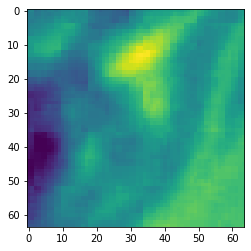

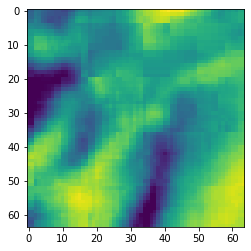

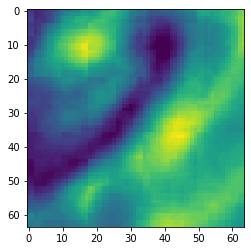

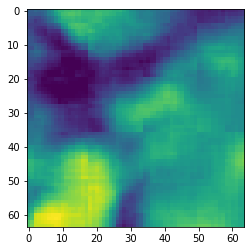

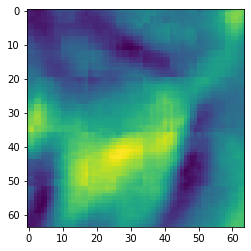

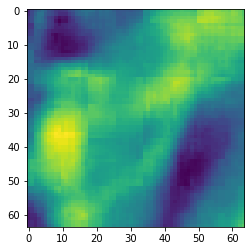

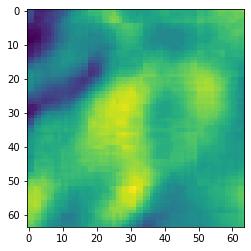

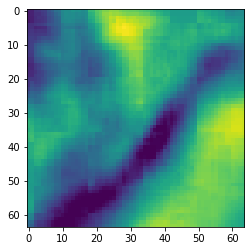

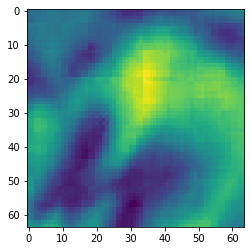

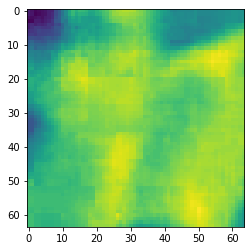

In [50]:
for q in range(0,100,10):
    plt.figure()
    plt.imshow(dat[mp+q,:,:,0])
    plt.show()

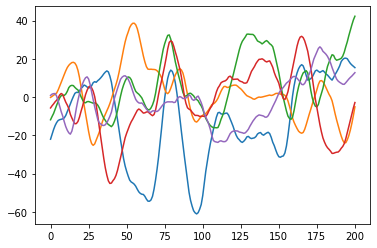

In [58]:
q=0
plt.figure()
plt.plot(svid[mq:(mq+lenny),q+0])
plt.plot(svid[mq:(mq+lenny),q+1])
plt.plot(svid[mq:(mq+lenny),q+2])
plt.plot(svid[mq:(mq+lenny),q+3])
plt.plot(svid[mq:(mq+lenny),q+4])
plt.show()

In [54]:
vid=dat
reduce=10
chipsize=8
n_components=8
x = vid.shape[1]
y = vid.shape[2]
c = chipsize
if not vid.shape[1]%chipsize == 0 or\
    not vid.shape[2]%chipsize == 0:
    print('get a better chipsize!')
tc = (x//c)*(y//c)
chips = np.zeros((vid.shape[0]*tc,c*c*vid.shape[3]))
for f in range(vid.shape[0]):
    grid = product(range(0, x-x%c, c), range(0, y-y%c, c))
    for n,ij in enumerate(grid):
        i,j = ij
        #chips[(f//reduce)*tc+n] = vid[f,i:(i+c),j:(j+c),:].flatten()
        chips[f*tc+n, :] = vid[f,i:(i+c),j:(j+c),:].flatten()
        #pdb.set_trace()
        #chips[f*tc+n,:] = copy.copy(vid[f,i:(i+c),j:(j+c),:].flatten())
chips.shape

(6558208, 64)

In [39]:
pca1.components_.shape

(12, 64)

In [48]:
128//8

16

In [45]:
np.where(np.max(chips,axis=1) == 0)[0][0]

256

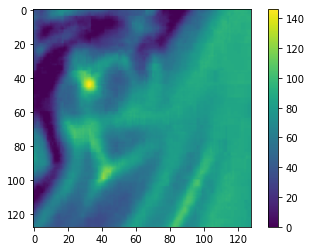

In [51]:
plt.figure()
plt.imshow(vid[50,:,:,0])
plt.colorbar()
plt.show()

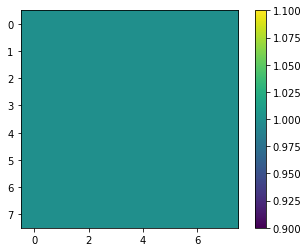

In [52]:
plt.figure()
plt.imshow(chips[16*16*50+3,:].reshape([8,8]))
plt.imshow(chips[250,:].reshape([8,8]))
plt.colorbar()
plt.show()

In [ ]:
pca = skd.PCA(n_components=n_components)
if reduce > 1:
    pca.fit(chips[::reduce])
    chips = pca.transform(chips)
else:
    chips = pca.fit_transform(chips)
chips
